F21DL Coursework,
Evan Sutherland, H00297347

# Choice of data set
I chose this data set because I have an interest in football and because a football match has both a large number of factors which can affect the outcome as well as having multiple interesting statistics from which conclusions can be drawn from. I have therefore chosen a soccer dataset from kaggle.com (Available at https://www.kaggle.com/ajumzu/bundesliga-1-results-and-metrics-2011-to-2021). This is a large dataset of football matches and the statistics from the German Bundesliga from the 2011/12 to the 2020/21 seasons as well as the pre-match bookmakers odds and team statistics. There are 55 different attributes and just over 3000 instances in this dataset. The dataset also contains a well defined dictionary which makes selecting the most appropriate attributes to use is straightforward.

# Setting up Python

In [1]:
#Asserting python 3 is used
import sys
assert sys.version_info >= (3, 5)

In [2]:
#Importing Sklearn and asserting v0.2 or greater is used
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
#Importing Numpy, File I/O and pandas 
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [4]:
#Importing matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importing the dataset

In [5]:
#Define the file path to the dataset
FOOTBALLSTATS_PATH = os.path.join("datasets","footballStats")

In [6]:
#Load the dataset using a function and convert to a pandas dataframe
def load_footballstats_data(footballstats_path = FOOTBALLSTATS_PATH):
    csv_path = os.path.join(footballstats_path,"SoccerData.csv")
    return pd.read_csv(csv_path)

In [7]:
football = load_footballstats_data()
football.head()

,Date,GameDay,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,FoulsDiff,HomeSeasonCorners,AwaySeasonCorners,CornersDiff,HomeSeasonYC,AwaySeasonYC,YCDiff,HomeSeasonRC,AwaySeasonRC,RCDiff
0,8.5.2011,1,Dortmund,Hamburg,3,1,H,2,0,H,...,0,0,0,0,0,0,0,0,0,0
1,8.6.2011,1,Augsburg,Freiburg,2,2,D,0,0,D,...,0,0,0,0,0,0,0,0,0,0
2,8.6.2011,1,FC Koln,Wolfsburg,0,3,A,0,1,A,...,0,0,0,0,0,0,0,0,0,0
3,8.6.2011,1,Hannover,Hoffenheim,2,1,H,2,1,H,...,0,0,0,0,0,0,0,0,0,0
4,8.6.2011,1,Hertha,Nurnberg,0,1,A,0,0,D,...,0,0,0,0,0,0,0,0,0,0


In [8]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3060 non-null   object 
 1   GameDay                 3060 non-null   int64  
 2   HomeTeam                3060 non-null   object 
 3   AwayTeam                3060 non-null   object 
 4   FullTimeHomeGoals       3060 non-null   int64  
 5   FullTimeAwayGoals       3060 non-null   int64  
 6   FullTimeResult          3060 non-null   object 
 7   HalfTimeHomeGoals       3060 non-null   int64  
 8   HalfTimeAwayGoals       3060 non-null   int64  
 9   HalfTimeResult          3060 non-null   object 
 10  HomeShots               3060 non-null   int64  
 11  AwayShots               3060 non-null   int64  
 12  HomeShotsOnGoal         3060 non-null   int64  
 13  AwayShotsOnGoal         3060 non-null   int64  
 14  HomeFouls               3060 non-null   

As we can see from using the .info() method, not all of the attributes have all the values, therefore it is an incomplete dataset. Some of the fields have blank values (the pre-match odds for a home win, draw and away win). The rest of the dataset is complete however. Since this is a relatively large dataset ~3000 results, we can delete the records which have a blank value, leaving us with a complete dataset. 

In [9]:
football.describe()

,GameDay,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnGoal,AwayShotsOnGoal,HomeFouls,...,FoulsDiff,HomeSeasonCorners,AwaySeasonCorners,CornersDiff,HomeSeasonYC,AwaySeasonYC,YCDiff,HomeSeasonRC,AwaySeasonRC,RCDiff
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,...,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,17.507843,1.653922,1.308170,0.732026,0.566667,14.097712,11.674837,5.137908,4.279412,13.648693,...,0.408170,79.163072,79.686928,-0.523856,30.415033,30.246405,0.168627,1.427451,1.412418,0.015033
std,9.817471,1.369172,1.218845,0.852714,0.738295,5.191960,4.694647,2.670520,2.408584,4.413987,...,47.699784,50.678997,50.438794,26.105059,19.329348,19.384803,9.695174,1.501758,1.487831,1.691015
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,-200.000000,0.000000,0.000000,-122.000000,0.000000,0.000000,-39.000000,0.000000,0.000000,-7.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,11.000000,...,-24.000000,37.000000,37.000000,-13.000000,14.000000,14.000000,-5.000000,0.000000,0.000000,-1.000000
50%,18.000000,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,13.000000,...,0.000000,77.000000,78.000000,0.000000,30.000000,29.000000,0.000000,1.000000,1.000000,0.000000
75%,26.000000,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,7.000000,6.000000,17.000000,...,24.000000,117.000000,116.000000,12.000000,45.000000,45.000000,5.000000,2.000000,2.000000,1.000000
max,34.000000,9.000000,7.000000,6.000000,5.000000,36.000000,32.000000,16.000000,14.000000,32.000000,...,190.000000,282.000000,276.000000,134.000000,86.000000,91.000000,51.000000,8.000000,8.000000,6.000000


Using the .describe() method we can see the mean, standard deviation, range and the 25%, 50% and 75% percentile for all the fields with numerical values (50 attributes out of 55). We can gain some basic insights into the dataset with this such as the average number of goals the away team scores is 1.272 which is less than the home team average of 1.65. This is expected as the home time typically has greater odds of winning matches and therefore more likely to score. Another example is there is a greater variance in the number of shots that the home team has compared to the away time. This is another expected value as the range of values is greater for the home team than the away team.

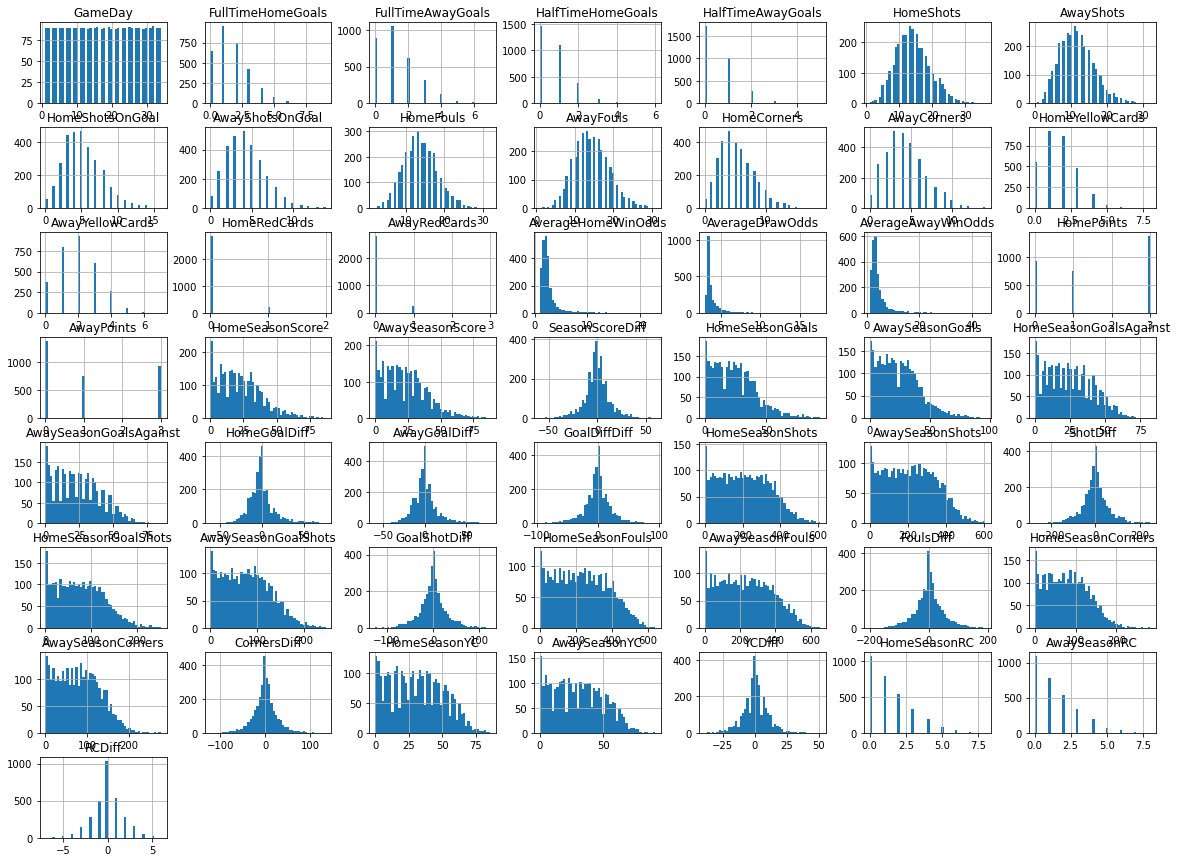

In [10]:
football.hist(bins=50, figsize=(20,15))
plt.show()

Using the .hist() function, we can see that a lot of the attributes follow a bell curve distribution sucha as the number of fouls in a match, the goal difference of two teams to name a few examples. We can plot scatter graphs to compare different attributes as shown below.

<AxesSubplot:xlabel='FullTimeHomeGoals', ylabel='AverageHomeWinOdds'>

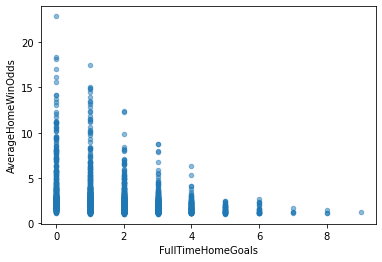

In [11]:
football.plot(kind="scatter", x = "FullTimeHomeGoals", y = "AverageHomeWinOdds", alpha = 0.5)

This graph plots the pre-match home team's odds of winning versus the number of goals that they scored. From the scatter graph, we can see a negative corralation between the Home win odds and the number of goals that the home team scored. That is, the lower the odds pre-match (The more likely a team was to win), the more likely they were to score more goals. We can see that only teams with pre-match odds of less than 5 scored more than 5 goals in the match. 

<AxesSubplot:xlabel='AwayRedCards', ylabel='FullTimeHomeGoals'>

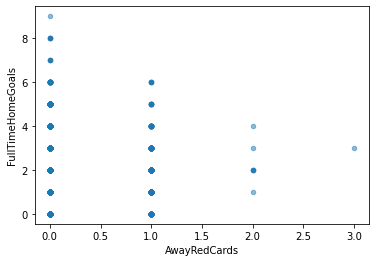

In [12]:
football.plot(kind="scatter", x = "AwayRedCards", y = "FullTimeHomeGoals", alpha = 0.5)


The above scatter plot shows the number of red cards the away team gets against the number of goals the home team scores. We can see from this data that the more red cards the team gets, the more likely they are to concede. For teams that receive 2 or more red cards, they always conceded.

In [13]:
corr_matrix = football.corr()

In [14]:
corr_matrix["AverageHomeWinOdds"].sort_values(ascending=False)

AverageHomeWinOdds        1.000000
AwayGoalDiff              0.578183
YCDiff                    0.389418
FoulsDiff                 0.381308
AwayShots                 0.350124
AwayPoints                0.328566
AwaySeasonScore           0.289579
AwayShotsOnGoal           0.288560
AwaySeasonGoals           0.282085
FullTimeAwayGoals         0.257444
AwayCorners               0.225739
AwaySeasonGoalShots       0.209765
HalfTimeAwayGoals         0.176891
RCDiff                    0.174747
AwaySeasonCorners         0.162492
AwaySeasonShots           0.153105
AverageDrawOdds           0.102121
HomeSeasonGoalsAgainst    0.089368
HomeYellowCards           0.076186
HomeFouls                 0.050810
HomeSeasonYC              0.042813
HomeSeasonRC              0.033482
HomeRedCards              0.015538
HomeSeasonFouls           0.014189
GameDay                  -0.013742
AwayRedCards             -0.056948
HomeSeasonCorners        -0.081646
HomeSeasonShots          -0.083837
AwaySeasonFouls     

Using the corr() function we can determine Pearson's R between one attribute against all the other attributes in the dataset. For example, corr() function of the home teams pre match odds has a positive moderate correlation between the attribute away goals different (this is the goal difference of the away team). This is expected as the worse an away teams goal difference is the more likely they are to concede more goals than they score and therefore more likely to lose. There is also a moderate negative correlation between this and the goal difference difference (this is a similar attribute which is the difference between the home teams and away teams goal difference). We can also see there is almost no correlation between the match odds attribute and the match week which is also expected.

# Preparing data for ML

1) We will remove any records in the dataset which contain any blank fields. We will drop the date column as this is not needed.

In [15]:
football = football.dropna(how='any',axis=0) 
# Drop any rows where there is a null value
football = football.drop('Date',1)

2) Convert categorical values into numbers using OrdinalEncoder from scikit learn. This will convert both the team names and the match result categorial values into numbers.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:

dataset_encoder = OrdinalEncoder()
dataset_encoder.fit(football[["HomeTeam","AwayTeam","HalfTimeResult","FullTimeResult"]])
football[["HomeTeam","AwayTeam","HalfTimeResult","FullTimeResult"]] = dataset_encoder.transform(football[["HomeTeam","AwayTeam","HalfTimeResult","FullTimeResult"]])


3) We will remove any negative values from our dataset by using the abs() function.

In [18]:
football = football.abs()
football_non_shuffled = football

4) We will shuffle the dataset to randomise the data and to prevent systemic correlation within the data

In [19]:
football = football.sample(frac = 1)

5) We will split the dataset into a training set and a testing set using the sklearn function train_test_split with the training data constituting 80% of the data with the remaining 20% being used for testing.

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(football, test_size = 0.2)

# Naive Bayes Classifier


We can now run Naive Bayes Classifier on the complete data set 

In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train.to_numpy(),train["FullTimeResult"])

MultinomialNB()

In [22]:
labels = model.predict(test)

# Analysis of Naive Bayes

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test["FullTimeResult"], labels)


array([[ 89,  65,   2],
       [  6,  98,  11],
       [  3,  81, 135]], dtype=int64)

As we can see from the confusion matrix, the diagonals are the number of correct predictions which total 300 out of a total of 490 which gives this an accuracy (success rate) of 61%.
We can then use the classification_report function that sklearn provides to find the precision and recall of each classification(Home Win(class 0), Draw(class 1) and Away Win(class 2))


In [24]:
from sklearn.metrics import classification_report
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       0.91      0.57      0.70       156
     class 1       0.40      0.85      0.55       115
     class 2       0.91      0.62      0.74       219

    accuracy                           0.66       490
   macro avg       0.74      0.68      0.66       490
weighted avg       0.79      0.66      0.68       490



The precision and recall for Home Wins are 0.80% and 0.47% respectively and the F-measure is therefore 0.59%
<br>
The precision and recall for Draws are 0.37% and 0.78% respectively and the F-measure is therefore 0.50%
<br>
The precision and recall for Away Wins are 0.91% and 0.62% respectively and the F-measure is therefore 0.74%
<br>
Overall, running Naive Bayes classifier on the complete dataset yields a respectable accuracy with a greater accuracy in correctly classifying home wins and away wins than draws.

# Creating 3 data sets of correlating features

We can find the most correlating features by once again using the correlation matrix function

In [25]:
corr_matrix = football.corr()

In [26]:
corr_matrix["FullTimeResult"].sort_values(ascending=False)

FullTimeResult            1.000000
HomePoints                0.986735
FullTimeHomeGoals         0.634105
HalfTimeResult            0.607908
HalfTimeHomeGoals         0.427371
HomeShotsOnGoal           0.392423
AverageAwayWinOdds        0.284389
HomeShots                 0.209825
AverageDrawOdds           0.137248
HomeSeasonScore           0.116663
HomeSeasonGoals           0.115211
HomeGoalDiff              0.102450
AwayRedCards              0.101754
AwaySeasonGoalsAgainst    0.095905
HomeSeasonGoalShots       0.082002
AwaySeasonRC              0.080505
AwaySeasonYC              0.069608
AwayTeam                  0.065488
AwayYellowCards           0.061825
HomeSeasonShots           0.059249
HomeSeasonCorners         0.051549
AwaySeasonFouls           0.034816
HomeCorners               0.026505
GameDay                   0.005186
AwayFouls                -0.002928
RCDiff                   -0.006812
YCDiff                   -0.009518
GoalShotDiff             -0.011949
CornersDiff         

In [27]:
football_set1 = football[["FullTimeResult","HomePoints","AwayPoints","HalfTimeResult","HalfTimeHomeGoals","HalfTimeAwayGoals"]]
football_set2 = football[["FullTimeResult","HomePoints","AwayPoints","HalfTimeResult","HalfTimeHomeGoals","HalfTimeAwayGoals","HomeShotsOnGoal","AwayShotsOnGoal","HomeShots","AwayShots"]]
football_set3 = football[["FullTimeResult","HomePoints","AwayPoints","HalfTimeResult","HalfTimeHomeGoals","HalfTimeAwayGoals","HomeShotsOnGoal","AwayShotsOnGoal","HomeShots","AwayShots","AverageHomeWinOdds","AverageAwayWinOdds","HomeShots","AwayShots","AverageDrawOdds"]]


In [28]:
#Splitting the new data sets into training and testing sets

train_set1, test_set1 = train_test_split(football_set1, test_size = 0.2)
train_set2, test_set2 = train_test_split(football_set2, test_size = 0.2)
train_set3, test_set3 = train_test_split(football_set3, test_size = 0.2)

# Running Naive Bayes on the new datasets

In [29]:
model_set1 = MultinomialNB()
model_set1.fit(train_set1,train_set1["FullTimeResult"])

model_set2 = MultinomialNB()
model_set2.fit(train_set2,train_set2["FullTimeResult"])

model_set3 = MultinomialNB()
model_set3.fit(train_set3,train_set3["FullTimeResult"])

MultinomialNB()

In [30]:
labels_set1 = model_set1.predict(test_set1)
labels_set2 = model_set2.predict(test_set2)
labels_set3 = model_set3.predict(test_set3)

# Analysis of Naive Bayes on the new datasets

In [31]:
print(confusion_matrix(test_set1["FullTimeResult"], labels_set1))
print(classification_report(test_set1["FullTimeResult"],labels_set1,target_names = ['class 0', 'class 1', 'class 2']))

[[158   0   0]
 [  0 117   0]
 [  0   0 215]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       158
     class 1       1.00      1.00      1.00       117
     class 2       1.00      1.00      1.00       215

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



In [32]:
print(confusion_matrix(test_set2["FullTimeResult"], labels_set2))
print(classification_report(test_set2["FullTimeResult"],labels_set2,target_names = ['class 0', 'class 1', 'class 2']))

[[131   2   0]
 [  0 114   0]
 [  0   4 239]]
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99       133
     class 1       0.95      1.00      0.97       114
     class 2       1.00      0.98      0.99       243

    accuracy                           0.99       490
   macro avg       0.98      0.99      0.99       490
weighted avg       0.99      0.99      0.99       490



In [33]:
print(confusion_matrix(test_set3["FullTimeResult"], labels_set3))
print(classification_report(test_set3["FullTimeResult"],labels_set3,target_names = ['class 0', 'class 1', 'class 2']))

[[135  17   0]
 [  0 117   6]
 [  0  19 196]]
              precision    recall  f1-score   support

     class 0       1.00      0.89      0.94       152
     class 1       0.76      0.95      0.85       123
     class 2       0.97      0.91      0.94       215

    accuracy                           0.91       490
   macro avg       0.91      0.92      0.91       490
weighted avg       0.93      0.91      0.92       490



The main conclusion that we can make from the naive bayes classifier on the new datasets is that the smaller the number of attributes used, the greater the precision and recall and subsequently the F-measure.
<br>
<br>
Comparing these three datasets with the full dataset, there is a clear correlation between the number of attributes on the accuracy(success rate) with the full set having an accuracy of 62% with a greater accuracy for the smaller data sets with dataset 3 having an accuracy of 94%, dataset 2 with accuracy of 98% and dataset1 (fewest attributes) having an accuracy of 100%. This was a surprising result as I did not expect having less attributes in the dataset having such a profound effect on the results of running Naive Bayes on the datasets. 
<br>
<br>
The use of fewer attributes reduces the amount of "noisy" data which may have affected the classifier and given an incorrect result.



# Conclusion
<br>
Overall, the Naive Bayes classifier was able to distinguish classes very well once only the most relevant attributes were selected. However, this is a simple data set, where the classification attribute has only 3 classes and is therefore likely to have a higher accuracy when running Naive Bayes classifier compared to a dataset with more classes. 


# Part 2 : Clustering


1) import K-means and make_blobs functions

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

2) Create blobs from fields in the dataset

In [35]:
blob_centers = np.array([[football["FullTimeHomeGoals"][0],football ["FullTimeAwayGoals"][0]],
                        [football["FullTimeHomeGoals"][1],football ["FullTimeAwayGoals"][1]],
                        [football["FullTimeHomeGoals"][2],football ["FullTimeAwayGoals"][3]],
                        [football["FullTimeHomeGoals"][3],football ["FullTimeAwayGoals"][4]]])
blob_std = np.array([0.2,0.2,0.2,0.2])

In [36]:
print(blob_centers)

[[3 1]
 [2 2]
 [0 1]
 [2 1]]


3) create blobs and plot into scatter graph

In [37]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [38]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

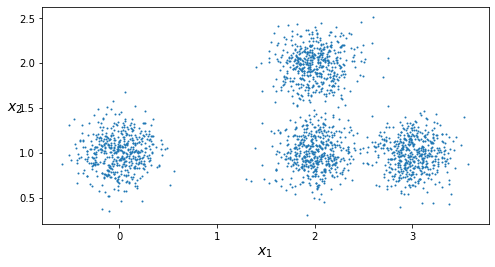

In [39]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

4) Run the k-means cluster algorithm to classify data into four separate clusters. We do not need to use an algorithm to determine the best value for K here as it is obvious.

In [40]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [41]:
kmeans.cluster_centers_

array([[ 3.00289703,  0.98565417],
       [-0.00406179,  1.0090585 ],
       [ 1.99698067,  1.98739217],
       [ 1.99817085,  0.99804156]])

In [42]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

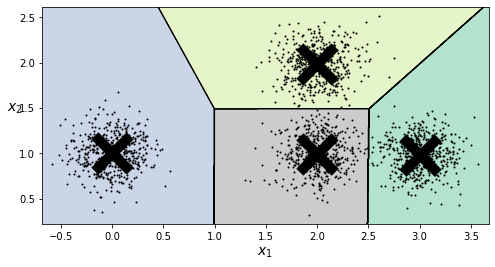

In [43]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

As you can see, the clustering algorithm works well on this example, with basically all of the points in their correct clusters, so the overall accuracy of this clustering is high. However, this is just a simple example with 4 data points used in total, so this is expected.

# A more advanced clustering example

We will plot clusters with the X-axis being the Home corners and the Y-axis being the Away corners attributes from the dataset.

In [44]:
blob_centers = football[['HomeCorners','AwayCorners']].to_numpy() # Convert to a numpy array where the x-coordinate is the home corners
blob_std = np.full((2448,2), 0.2) # Let the deviation for each blob to be 0.2


In [45]:
print(blob_centers)

[[4 4]
 [4 3]
 [2 4]
 ...
 [9 5]
 [5 4]
 [3 4]]


In [46]:
print(blob_std)

[[0.2 0.2]
 [0.2 0.2]
 [0.2 0.2]
 ...
 [0.2 0.2]
 [0.2 0.2]
 [0.2 0.2]]


In [47]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

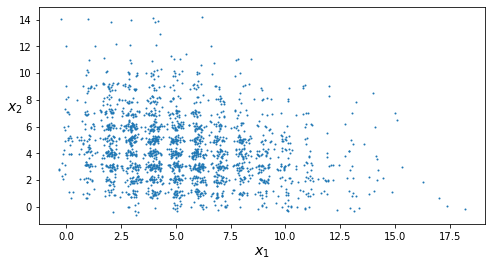

In [48]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

When we use fields from the dataset, we can see that lots of smaller clusters are formed.
This is because the fields we are using contain a fixed numerical value and the more of this value appears in the dataset, the larger the resultant cluster. We could increase the spread of each cluster by increasing the deviation value assigned for each.

In [49]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [50]:
kmeans.cluster_centers_

array([[3.88209633, 3.1495243 ],
       [8.95957993, 3.28941417],
       [3.87401085, 7.49742622]])

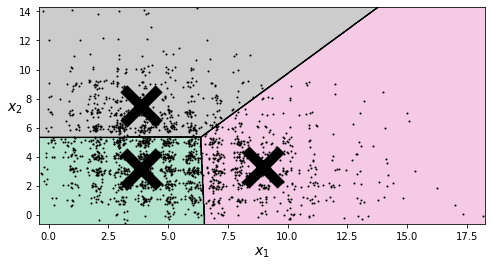

In [51]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

When we repeat it using complete fields from the dataset, we can see the clustering algorithm still works fairly well but not as well as when the values were more distinct like in the first example. 

With the above example, it is a lot harder to find the optimal number of clusters within a dataset (compared to the first example) and it would be preferable to use an algorithm that computes this. We can use the Elbow curve graph to determine the best value for K. This computes k means for k values between 2 and 10 and the sum of the square distances between the points and the centre of the clusters. 


Text(0.5, 1.0, 'Elbow curve')

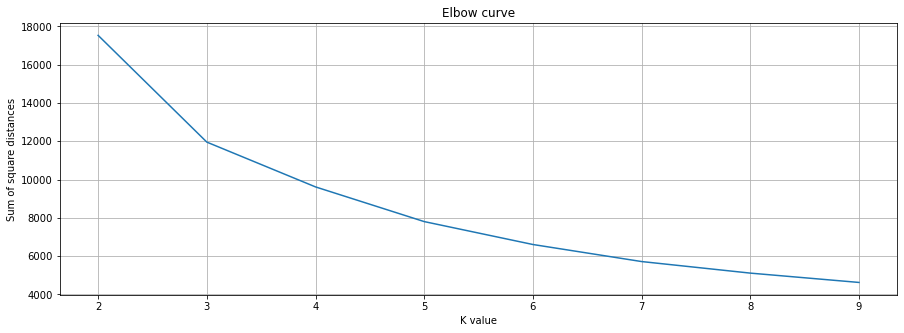

In [52]:

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel("K value")
plt.ylabel("Sum of square distances")
plt.title('Elbow curve')

As you can see from the above graph, the optimal value for the second example is 3.
With the optimal value picked, the accuracy of the clustering is increased.

# Comparison with Naive Bayes

On this dataset, Naive Bayes was a good classifier due to the nature of the dataset used, with a fairly high recall, precision and subsequent F score, when the appropriate fields were selected. While the k means clustering algorithm worked well when only a few points were selected, it does not work as well when whole fields are used. This is again likely due to the nature of the dataset, with most fields having predictable values, making strong clusters unlikely to appear in the dataset. I did not have time to try all the different fields to find the best attributes that produced clear clusters. 

# Section 3 : Supervised Learning: Generalisation & Overfitting; Decision trees.


In [63]:
from sklearn.tree import DecisionTreeClassifier,plot_tree # Setup

Splitting the data set into testing and training sets (80% training, 20% testing)

In [64]:
train_tree, test_tree = train_test_split(football, test_size = 0.2)

In [65]:
X = train_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = train_tree["FullTimeResult"] # Class

In [66]:
# Creation of the tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf = clf.fit(X, y)

NameError: name 'tree' is not defined

In [67]:
# Plotting tree
plot_tree(tree_clf)

NameError: name 'tree_clf' is not defined

Testing the decision tree using 80/20 testing data set

In [68]:

labels = tree_clf.predict(test_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy())
# Getting metrics of predictions
print(classification_report(test_tree["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))


NameError: name 'tree_clf' is not defined

Overall, the accuracy of the decision tree algorithm running on the dataset is respectable with an overall accuracy of 78% with the precision of Home and Away wins being 1 and the recall for draws being 1 as well. We can therefore say that the decision tree model for this dataset generalises well with new data. This is due to the nature of the dataset where any new data will be similar to existing data and the fact that the classification of a result is very straightforward.


In [69]:
#Moving 30% of instances from training set to testing set
print(len(train_tree.index))
print(len(test_tree.index))

1958
490


In [70]:
print((1956 // 100) * 30) # 30% of the training set
print((1956 // 100) * 60) # 60% of the training set

570
1140


In [71]:
train30 = train_tree.head(570)
train_tree30 = train_tree.iloc[570:]
test_tree30 = pd.concat([test_tree,train30])
print(len(train_tree30.index))
print(len(test_tree30.index))

1388
1060


In [72]:
train60 = train_tree.head(1140)
train_tree60 = train_tree.iloc[1140:]
test_tree60 = pd.concat([test_tree,train60])
print(len(train_tree60.index))
print(len(test_tree60.index))

818
1630


# 30% example

In [73]:
X = train_tree30[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = train_tree30["FullTimeResult"] # Class

In [74]:
tree_clf30 = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf30 = clf.fit(X, y)

NameError: name 'tree' is not defined

In [75]:

labels = tree_clf30.predict(test_tree30[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy())
# Getting metrics of predictions
print(classification_report(test_tree30["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

NameError: name 'tree_clf30' is not defined

# 60% example

In [76]:
X = train_tree60[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = train_tree60["FullTimeResult"] # Class

In [77]:
tree_clf60 = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf60 = clf.fit(X, y)

NameError: name 'tree' is not defined

In [78]:
labels = tree_clf60.predict(test_tree60[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy())
# Getting metrics of predictions
print(classification_report(test_tree60["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

NameError: name 'tree_clf60' is not defined

There is a marginal increase for the accuracy of the 30% example (0.02/2%) and a (0.01/1%) improvement for 60% example. The effect of increasing the size of the training data on this dataset does not affect the overall accuracy or F measure for the model in both the 30% and 60% examples by a noticable margin.Therefore we can say that this model does not suffer from overfitting even when the testing data set is larger than the training set used.

# K-fold cross validation

In [79]:
#K fold cross validation, uses the training data set split into 10 folds, used to predict 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
football = football_non_shuffled
X = np.array(football[["FullTimeHomeGoals","FullTimeAwayGoals"]])
y = np.array(football["FullTimeResult"])

In [80]:
count = 0
for train_index, test_index in kf.split(X):
     count = count + 1
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index] 
     tree_K_fold = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
     tree_K_fold = clf.fit(X_train,y_train)   
     labels = tree_K_fold.predict(X_test)
     print("Fold Number : " , count)
     print(classification_report(y_test,labels,target_names = ['class 0', 'class 1', 'class 2']))

NameError: name 'tree' is not defined

While the accuracy of each fold and the precision, recall and combined f-measure of each class in each fold vary. The average accuracy across the 10 folds was 0.79 which is very similar to using the test/train split. In general, this classifier works very well with this dataset, although it has a similar nature. It offers improved accuracy over Naive Bayes classifier which only had an accuracy of 0.64 when all the attributes are used. However, it is not as good as using the Naive Bayes classifier when the number of attributes were restricted to 6 which yielded a 100% accuracy.

# Modifying Parameters

In [81]:
X = train_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = train_tree["FullTimeResult"] # Class
# Creation of the tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42, splitter = "random")
tree_clf = clf.fit(X, y)
plot_tree(tree_clf)

NameError: name 'tree' is not defined

In [82]:
labels = tree_clf.predict(test_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy())
# Getting metrics of predictions
print(classification_report(test_tree["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

NameError: name 'tree_clf' is not defined

The effect of changing the splitting strategy from "best"(default) to "random" does not have any affect on the tree's accuracy, or the F-measure, precision or recall of the classification.


In [83]:
X = train_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = train_tree["FullTimeResult"] # Class
# Creation of the tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42, criterion = "entropy")
tree_clf = clf.fit(X, y)
plot_tree(tree_clf)

NameError: name 'tree' is not defined

In [84]:
labels = tree_clf.predict(test_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy())
# Getting metrics of predictions
print(classification_report(test_tree["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

NameError: name 'tree_clf' is not defined

The effect of changing the criterion strategy from "gini"(default) to "entropy" also does not have any affect on the tree's accuracy, or the F-measure, precision or recall of the classification.

   # Random Forest  

In [85]:
from sklearn.ensemble import RandomForestRegressor
X = train_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = train_tree["FullTimeResult"] # Class to predict
train_tree, test_tree = train_test_split(football, test_size = 0.2)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X,y)
labels = tree_clf.predict(test_tree[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy())
# Getting metrics of predictions
print(classification_report(test_tree["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))


NameError: name 'tree_clf' is not defined

The random forest regressor produces the exact same output for this dataset.

# Section 4: Neural Networks and Convolutional Neural Networks

1) Run a Linear classifier on the training data set

In [196]:
from sklearn.linear_model import RidgeClassifier
X = football_non_shuffled[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy() # Parameters to be used to predict class
y = football_non_shuffled["FullTimeResult"] # Class to predict

Using 10 fold cross validation

In [87]:
kf = KFold(n_splits=10)
count = 0
for train_index, test_index in kf.split(X):
     count = count + 1
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index] 
     clf = RidgeClassifier().fit(X_train, y_train)
     labels = clf.predict(X_test)
     print("Fold Number : " , count)
     print(classification_report(y_test,labels,target_names = ['class 0', 'class 1', 'class 2']))

Fold Number :  1
              precision    recall  f1-score   support

     class 0       0.79      1.00      0.88        67
     class 1       1.00      0.24      0.38        63
     class 2       0.79      1.00      0.88       115

    accuracy                           0.80       245
   macro avg       0.86      0.75      0.72       245
weighted avg       0.84      0.80      0.76       245

Fold Number :  2
              precision    recall  f1-score   support

     class 0       0.88      1.00      0.93        78
     class 1       1.00      0.34      0.51        61
     class 2       0.79      1.00      0.88       106

    accuracy                           0.84       245
   macro avg       0.89      0.78      0.78       245
weighted avg       0.87      0.84      0.81       245

Fold Number :  3
              precision    recall  f1-score   support

     class 0       0.76      1.00      0.86        78
     class 1       1.00      0.15      0.26        61
     class 2       0.80 

Using training and testing sets

In [88]:
train, test = train_test_split(football_non_shuffled, test_size = 0.2)
X = train[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy()
y = train["FullTimeResult"]
clf = RidgeClassifier().fit(X, y)
labels = clf.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])

In [89]:
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       0.83      1.00      0.91       148
     class 1       1.00      0.23      0.38       124
     class 2       0.77      1.00      0.87       218

    accuracy                           0.81       490
   macro avg       0.87      0.74      0.72       490
weighted avg       0.85      0.81      0.76       490



The overall accuracy of the Ridge linear classifier yields an accuracy of 0.82 with K fold cross validation and 0.81 with the training and testing set. We can generalise and say the use of K fold and training and testing sets has no effect on the ridge classifier and therefore it generalises well to new data. Again, due to the nature of the dataset. We can also hypothesise that the data set is linearly separable due to the high F scores for the home win and away win classes.

# MLP classification

In [106]:
from sklearn.neural_network import MLPClassifier

Running with default parameters

In [149]:
reg = MLPClassifier(random_state=42).fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       148
     class 1       1.00      1.00      1.00       124
     class 2       1.00      1.00      1.00       218

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



C:\Users\evan_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Modifying parameters of MLP

Modifying the learning rate to be lower. Default is 0.001

In [195]:
X = train[["FullTimeHomeGoals","FullTimeAwayGoals"]].to_numpy()
reg = MLPClassifier(random_state=42,learning_rate = 'constant', learning_rate_init = 0.00001, solver = 'sgd').fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       148
     class 1       0.39      0.76      0.51       124
     class 2       0.88      1.00      0.94       218

    accuracy                           0.64       490
   macro avg       0.42      0.59      0.48       490
weighted avg       0.49      0.64      0.55       490



C:\Users\evan_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-

The effect of reducing the learning rate from 0.001 to 0.00001 (2 orders of magnitude) reduced the overall accuracy of the classifier to 64% with very poor F-measures for the home win and draw classes. This is likely due to not having enough iterations (default is 200).

In [146]:
reg = MLPClassifier(random_state=42,learning_rate = 'constant', learning_rate_init = 0.00001 , max_iter = 2000 ,solver = 'sgd').fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       148
     class 1       1.00      0.76      0.86       124
     class 2       0.88      1.00      0.94       218

    accuracy                           0.94       490
   macro avg       0.96      0.92      0.93       490
weighted avg       0.95      0.94      0.94       490



Increasing the iterations from 200 to 2000 corrected increased the overall accuracy from 0.64 -> 0.94, more iterations will likely return the accuracy to 100 however further increasing the max_iter will increase the computation time.

Modifying the momentum attribute (default = 0.9)

In [155]:
reg = MLPClassifier(random_state=42,  momentum = 0.4, solver = 'sgd').fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       148
     class 1       1.00      0.98      0.99       124
     class 2       0.99      1.00      0.99       218

    accuracy                           0.99       490
   macro avg       1.00      0.99      0.99       490
weighted avg       0.99      0.99      0.99       490



C:\Users\evan_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modifying the momentum value from the 0.9 default to 0.4, decreases the overall accuracy from 100 to 99. A momentum value greater than 0.4 does not affect the overall accuracy of the MLP classifier. Even decreasing the momentum value several orders of magnitude (0.9 -> 0.001) only yields a 0.06 drop in accuracy, therefore the momentum value does not have a strong effect on the accuracy of the classifier.

Modifying the activation function (default = relu)

In [158]:
reg = MLPClassifier(random_state=42, activation = 'tanh').fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       148
     class 1       1.00      1.00      1.00       124
     class 2       1.00      1.00      1.00       218

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



Changing the activation function does not have an effect on the accuracy of the MLP classifier

Modifying layer size and number of layers

In [178]:
reg = MLPClassifier(random_state=42, hidden_layer_sizes = (1,1,1)).fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       148
     class 1       0.00      0.00      0.00       124
     class 2       0.44      1.00      0.62       218

    accuracy                           0.44       490
   macro avg       0.15      0.33      0.21       490
weighted avg       0.20      0.44      0.27       490



C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reducing the hidden layer sizes to 3 layers of size 1, reduced the overall accuracy to 0.44 with a 0 F-measure for the Home Win and Draw classifications. This is due to not having a layer size that is the same size as the number of classes (3). Changing the hidden_layer_sizes to 3 corrected this.

In [185]:
reg = MLPClassifier(random_state=42, hidden_layer_sizes = (3,3,3)).fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       148
     class 1       1.00      1.00      1.00       124
     class 2       1.00      1.00      1.00       218

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



C:\Users\evan_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Adding many more layers also reduced the accuracy 

In [193]:
reg = MLPClassifier(random_state=42, hidden_layer_sizes = (3,3,3,3,3,3)).fit(X, y)
labels = reg.predict(test[["FullTimeHomeGoals","FullTimeAwayGoals"]])
print(classification_report(test["FullTimeResult"],labels,target_names = ['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       148
     class 1       0.00      0.00      0.00       124
     class 2       0.64      1.00      0.78       218

    accuracy                           0.75       490
   macro avg       0.55      0.67      0.59       490
weighted avg       0.59      0.75      0.65       490



C:\Users\evan_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evan_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-

# Summary and conclusion

The dataset used for the coursework uses a very simple classification, that is, classifying whether a game was a win for the home team, away team or a draw by looking at the scoreline. This is trivial for humans and most classifiers, supervised and unsupervised, predicted this with a decent degree of accuracy. We can say that the data is linearly separable as we could drop the draw results and plot the home and away wins on a graph and easily draw that separates the two that classifies all the results correctly.

For this dataset, we can see that the MLP generalises well to new data in this case, with accuracy of 100%. However, this may not be the case for other datasets such as the iris dataset which is more difficult to classify correctly.